In [ ]:
#Sentiment analysis program parses the tweets from twitter

In [17]:
#import
import tweepy#Tweepy is an open source Python package that gives you a very convenient way to access the Twitter API with Python.
from textblob import TextBlob#TextBlob is a Pythonlibrary for processing textual data. It provides a simple API for diving into common natural language processing (NLP)
from wordcloud import WordCloud,STOPWORDS#Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [18]:
#Load data
consumerKey="IlYba6WAyj2ZlGZ7xxvo7VfRo"
consumerSecret="6PqgBfg6vefupkcmOU2ci6MUhTSek7ivuggGbCzRf9HywsFpzX"
accessToken="3185215411-PwFfHQcAXtWOOVjw01EAzqt4SiAgAkEavzcJkfx"
accessTokenSecret="c5EKycTxB9kaeFyIquS6LrYhu03So9oabUKgJmoMi7tcf"

In [19]:
#Create the authentication object
authenticate=tweepy.OAuthHandler(consumerKey,consumerSecret)
#Set access token and access token secret
authenticate.set_access_token(accessToken,accessTokenSecret)
#create API object while passing in the auth information
api=tweepy.API(authenticate,wait_on_rate_limit=True)

In [20]:
#Extract 100 tweets from twitter user
posts=api.user_timeline(screen_name="kunalb11",count=100,lang="en",tweet_mode="extended")
#print last 5 tweets
i=1
for tweet in posts[0:5]:
  print(str(i)+tweet.full_text +'\n')
  i=i+1

1Startup’s success can be predicted by % of extremely curious people they have in their team.

2@banglani You should read up on how he works and launched cash app by dropping everything with a small team.

3Your saving account earns :

4Innovation needs complete obsession and can’t be done part time.

5Entropy is bae. https://t.co/HnZGFmTvO9



In [21]:
#create a dataframe with a column called Tweets
df=pd.DataFrame([tweet.full_text for tweet in posts],columns=["Tweets"]) # column name as tweets
#First five
df.head()

,Tweets
0,Startup’s success can be predicted by % of ext...
1,@banglani You should read up on how he works a...
2,Your saving account earns :
3,Innovation needs complete obsession and can’t ...
4,Entropy is bae. https://t.co/HnZGFmTvO9


In [22]:
# clean the text (removing #,@)
#We create a func to clean the tweets
def cleanTxt(text):
  text=re.sub(r'@[A-Za-z0-9]+','',text) # r indicates raw data #remove @ mentionings
  text=re.sub(r'#','',text)# removing #
  text=re.sub(r'RT[\s]+','',text) #removing retweetRT
  text=re.sub(r'https?:\/\/\S+','',text)# remove the hyper link
  return text
#Cleaning text
df['Tweets']=df['Tweets'].apply(cleanTxt)
df

,Tweets
0,Startup’s success can be predicted by % of ext...
1,You should read up on how he works and launch...
2,Your saving account earns :
3,Innovation needs complete obsession and can’t ...
4,Entropy is bae.
...,...
95,: Everything happens for a reason you make up ...
96,Only those should be celebrated. Not funded o...
97,: What the Zerodha salaries are saying:\n\nYES...
98,: Eventually the only objects remaining in the...


In [23]:
#create a function to get subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)
df

,Tweets,Subjectivity,Polarity
0,Startup’s success can be predicted by % of ext...,0.500,0.100
1,You should read up on how he works and launch...,0.400,-0.250
2,Your saving account earns :,0.000,0.000
3,Innovation needs complete obsession and can’t ...,0.400,0.100
4,Entropy is bae.,0.000,0.000
...,...,...,...
95,: Everything happens for a reason you make up ...,0.000,0.000
96,Only those should be celebrated. Not funded o...,0.875,0.175
97,: What the Zerodha salaries are saying:\n\nYES...,0.450,0.200
98,: Eventually the only objects remaining in the...,0.600,0.150


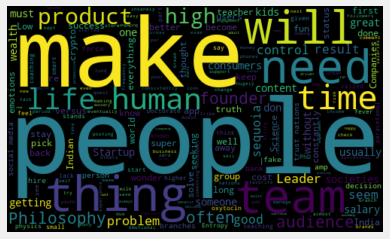

In [24]:
#plot Word cloud(common word occured)
allWords=''.join([twts for twts in df['Tweets']])
wordCloud= WordCloud(width=500,height=300,random_state=21,max_font_size=199).generate(allWords)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [25]:
#create a func to compute negative,neutral and positive analysis
def getAnalysis(score):
  if score <0:
    return 'Negative'
  elif score==0:
      return 'Neutral'
  else:
      return 'Positive'
df['Analysis']=df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Startup’s success can be predicted by % of ext...,0.500,0.100,Positive
1,You should read up on how he works and launch...,0.400,-0.250,Negative
2,Your saving account earns :,0.000,0.000,Neutral
3,Innovation needs complete obsession and can’t ...,0.400,0.100,Positive
4,Entropy is bae.,0.000,0.000,Neutral
...,...,...,...,...
95,: Everything happens for a reason you make up ...,0.000,0.000,Neutral
96,Only those should be celebrated. Not funded o...,0.875,0.175,Positive
97,: What the Zerodha salaries are saying:\n\nYES...,0.450,0.200,Positive
98,: Eventually the only objects remaining in the...,0.600,0.150,Positive


In [28]:
#print all of the positive tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]): #sortedDF.shape(0)->no.of rows
   if(sortedDF['Analysis'][i]=='Positive'):
     print(str(j)+sortedDF['Tweets'][i])
     print()
     j=j+1

1Startup’s success can be predicted by % of extremely curious people they have in their team.

2Innovation needs complete obsession and can’t be done part time.

3_nerd This is true. Polygamous societies have high civil unrest.

4I wonder if people who start getting a lot of oxytocin through physical intimacy naturally feel lower need to outrage/hate on social media. 

Oxytocin deprivation may also see an improvement with onset of pets in people’s life.

5All truth seeking is Philosophy. When you have a breakthrough in physics, you’re conferred a PhD, which stands for Doctorate in Philosophy. Science itself was called Natural Philosophy before it was known as Science. 

6_bikram_saha   All science is philosophy. When you become great at physics you are given PhD. It stands for Doctorate in Philosophy.

7 All great ideas are usually late realizations ;)

8People who project a higher status than their actual substance, don’t miss an opportunity to dramatically complain about all minor in

In [29]:
#print all -ve tweets
j=1
sortedDF=df.sort_values(by=['Polarity'],ascending='False')
for i in range(0,sortedDF.shape[0]): #sortedDF.shape(0)->no.of rows
   if(sortedDF['Analysis'][i]=='Negative'):
     print(str(j)+sortedDF['Tweets'][i])
     print()
     j=j+1

1 You should read up on how he works and launched cash app by dropping everything with a small team.

2 Stay strong. This is unfortunate.

3_sequoia What if that hard working fund doesn’t have size/appetite to do pro rata in the next round?  Or support you with a bridge if things go wrong? Should that be considered as an important metric?

4People try new products from known brands due to familiarity but stay back only for experience. 

People try products of unknown brands for incentives/narratives but stay back only for experience.

5Gaining control over emotions is an eternal human quest. 

Those who manage to do it well end up having poor birth rate, constantly reducing their tribe. 

human species constantly loops back to more emotions than less in long enough time period.

6 Different problem isn’t it? Considering how little humans needs in life to survive, one can classify almost all products under missell category.

7Grocery stores keep high frequency products like milk &amp; b

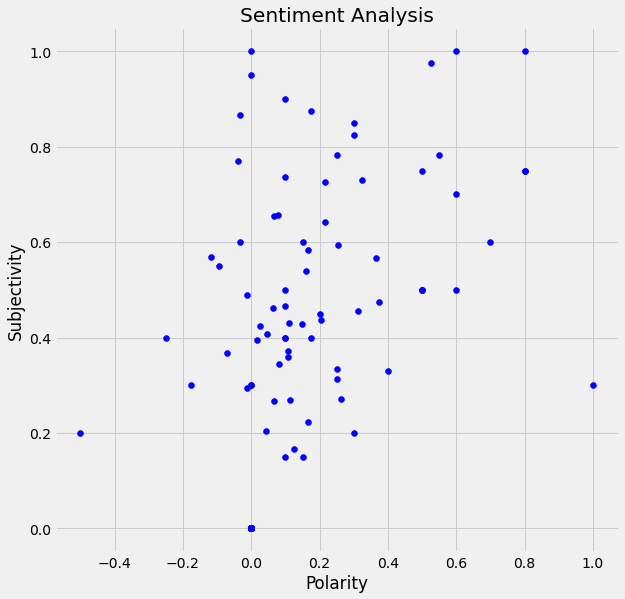

In [30]:
#plot the polarity and subjectivity
plt.figure(figsize=(9,9))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [31]:
#to get % of +ve tweets
postwe=df[df.Analysis=='Positive']
#postwe=postwe['Tweets']
round(postwe.shape[0]/df.shape[0]*100,1)

60.0

In [32]:
#to get % of -ve tweets
postwe=df[df.Analysis=='Negative']
#postwe=postwe['Tweets']
round(postwe.shape[0]/df.shape[0]*100,1)

11.0

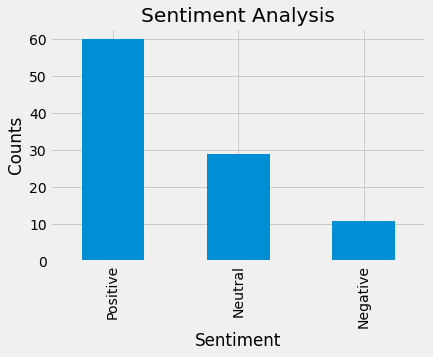

In [33]:
#show the value counts
df['Analysis'].value_counts()
#plot
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()